# 1- import pandas and read csv file





In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')

# 2- explore the data

In [2]:
df.shape

(212331, 15)

In [3]:
df.head(3)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na


#3- cleaning and tiding

## * convert non-numeric values within "Mean Score" and "Percent Scoring 80 or Above" into null and delete rows with null



In [4]:
columns_to_convert = ['Mean Score', 'Percent Scoring 80 or Above']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [5]:
df.isnull().sum()

School DBN                         0
School Name                        0
School Level                       0
Regents Exam                      10
Year                               0
Total Tested                       0
Mean Score                     75222
Number Scoring Below 65            0
Percent Scoring Below 65           0
Number Scoring 65 or Above         0
Percent Scoring 65 or Above        0
Number Scoring 80 or Above         0
Percent Scoring 80 or Above    75222
Number Scoring CR                  0
Percent Scoring CR                 0
dtype: int64

In [6]:
df_clean = df.dropna(subset=['Mean Score', 'Percent Scoring 80 or Above'])

In [7]:
df_clean.isnull().sum()

School DBN                     0
School Name                    0
School Level                   0
Regents Exam                   8
Year                           0
Total Tested                   0
Mean Score                     0
Number Scoring Below 65        0
Percent Scoring Below 65       0
Number Scoring 65 or Above     0
Percent Scoring 65 or Above    0
Number Scoring 80 or Above     0
Percent Scoring 80 or Above    0
Number Scoring CR              0
Percent Scoring CR             0
dtype: int64

##*  filter data

In [11]:
df1 = df_clean[['School DBN','Year','Regents Exam','Mean Score','Percent Scoring 80 or Above']]

## * rename columns with abreviations

In [12]:
df2 = df1.rename(columns={'School DBN': 'School District/borough/number'})

##* select "22K425" school DBN and assign it to a data frame called "df2_chosen"

In [13]:
df2_chosen = df2[df2["School District/borough/number"]=='22K425']

##* filter and assign all other schools to a data frame called "df2_others"

In [14]:
df2_others = df2.loc[~df2["School District/borough/number"].str.contains("22K425")]

##* filter and assign brooklyn schools to a data frame called "df2_brooklyn"

In [15]:
df2_brooklyn = df2[df2["School District/borough/number"].str.contains("K")]

#4- descriptive statistics

In [16]:
chosen = df2_chosen['Mean Score'].mean()
chosen

67.81190476190476

In [17]:
others = df2_others['Mean Score'].mean()
others

65.99339595724602

In [18]:
brooklyn = df2_brooklyn['Mean Score'].mean()
brooklyn

64.8210394376389

In [19]:
clean = df_clean['Mean Score'].mean()
clean

65.99896651569189

## Bar graph showing diffrences between the different grouping using the mean score average

<Axes: >

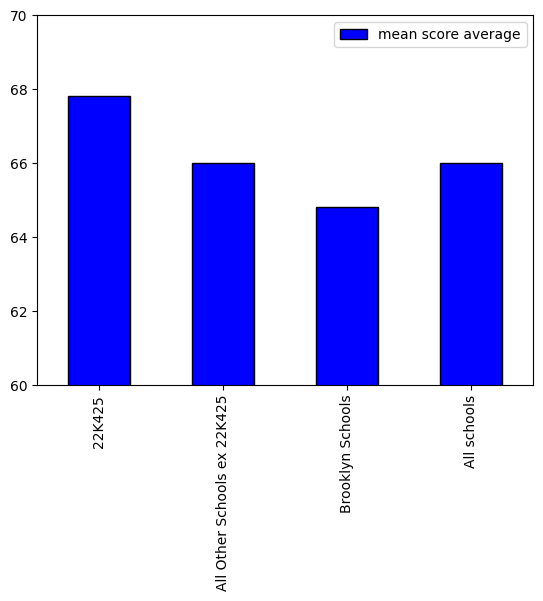

In [21]:
mean_all =  pd.DataFrame({"mean score average": [chosen, others, brooklyn, clean]},index=["22K425", "All Other Schools ex 22K425", "Brooklyn Schools", "All schools"])

mean_all.plot(kind="bar",color=('blue'),ylim = (60,70),edgecolor='black')


# Bar graph showing the mean percentage scoring 80 or above in each regents exam

In [22]:
df2_chosen_regents = df2_chosen.groupby('Regents Exam')['Percent Scoring 80 or Above'].mean().sort_values(ascending=False)

<Axes: xlabel='Regents Exam'>

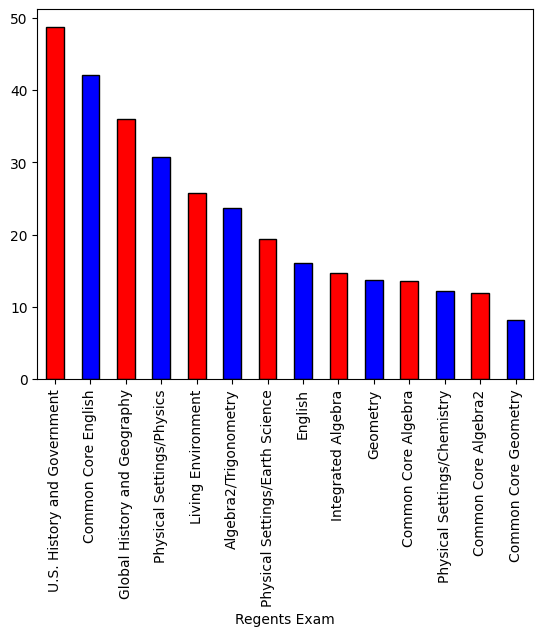

In [23]:
df2_chosen_regents.plot(kind='bar',color=('red','blue'),edgecolor='black')

In [24]:
df2_others_regents = df2_others.groupby('Regents Exam')['Percent Scoring 80 or Above'].mean().sort_values(ascending=False)

<Axes: xlabel='Regents Exam'>

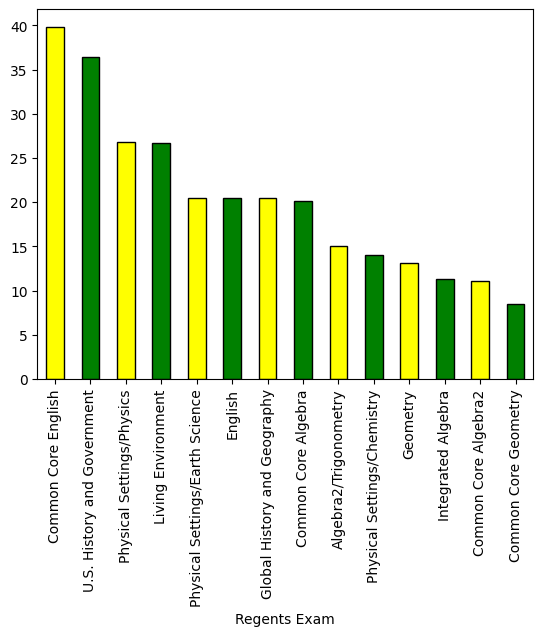

In [26]:
df2_others_regents.plot(kind='bar',color=('yellow','green'),edgecolor='black')

In [27]:
df2_brooklyn_regents = df2_brooklyn.groupby('Regents Exam')['Percent Scoring 80 or Above'].mean().sort_values(ascending=False)

<Axes: xlabel='Regents Exam'>

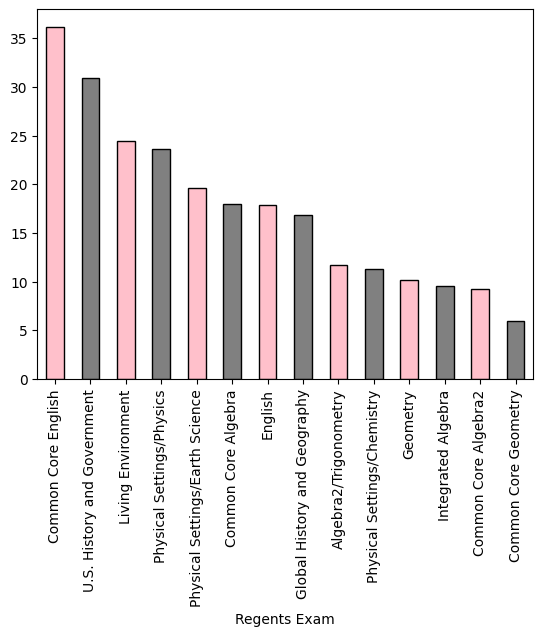

In [28]:
df2_brooklyn_regents.plot(kind='bar',color=('pink','grey'),edgecolor='black')

In [29]:
df2_clean_regents = df_clean.groupby('Regents Exam')['Percent Scoring 80 or Above'].mean().sort_values(ascending=False)

<Axes: xlabel='Regents Exam'>

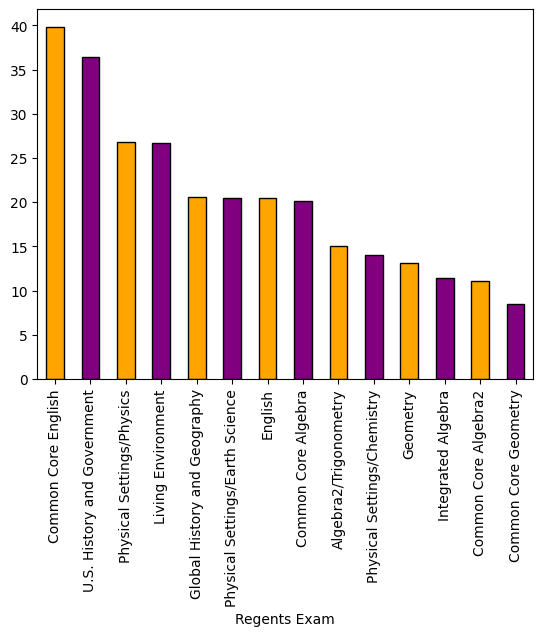

In [30]:
df2_clean_regents.plot(kind='bar',color=('orange','purple'),edgecolor='black')

# ***findings***
the chosen school 22K425 was the highest mean score average and they are best in U.S. History and government regents scores